## Data Story

In this notebook, I will explore a subset of the data using the Los Angeles files and try to uncover some interesting initial trends and qualities of the Airbnb data. Since the reviews data only contains ID numbers and review text (which will be analyzed with machine learning later on in the project), I will be focusing on the listings data in this notebook.

**Note:** Code for maps is partially based on the blog post ['Visualizaing Population Density by Zip Code with basemap'](http://www.jtrive.com/visualizing-population-density-by-zip-code-with-basemap.html) by James D. Triveri

In [17]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.colors import rgb2hex
import seaborn as sns

# map for geospatial data
from mpl_toolkits.basemap import Basemap

# remove warnings
import warnings
warnings.filterwarnings("ignore")

# show all columns
pd.set_option('display.max_columns', None)

# set seaborn theme
sns.set_style('dark')

%matplotlib inline

In [3]:
# load the data
listings = pd.read_csv('/Users/limesncoconuts2/springboard_data/data_capstone_one/los_angeles/los-angeles_listings.csv')

### What will we explore in this data story?

The listings data has over 100 columns of information to analyze, but we want to explore aspects of the dataset that we think will be the most influential on our price prediction. Therefore, I will focus the following columns in this data story:

**Beds, Baths, Square Footage**
- How does average price change with different numbers of beds?
- How does average price change with different numbers of bathrooms?
- How does average price change with different square footage?

**Zipcodes**
- How does average price change across zipcodes?
- How is price geographically distributed in Los Angeles?

**Property Types**
- How does average price change for different property types?
- How are different property types geographically distributed in Los Angeles?

### Where are Airbnbs located in Los Angeles?

The following map shows the locations for each listing in our dataset. Since the datapoints are transparent, areas with a higher concentration of listings will appear more opaque.

In [8]:
lon_min = listings.longitude.min()
lon_max = listings.longitude.max()
lat_min = listings.latitude.min()
lat_max = listings.latitude.max()

print('Minimum longitude:', lon_min)
print('Maximum longitude:', lon_max)
print('Minimum latitude:', lat_min)
print('Maximum latitude:', lat_max)

Minimum longitude: -118.93422403803541
Maximum longitude: -117.64753320949585
Minimum latitude: 33.33848276023134
Maximum latitude: 34.81119326709049


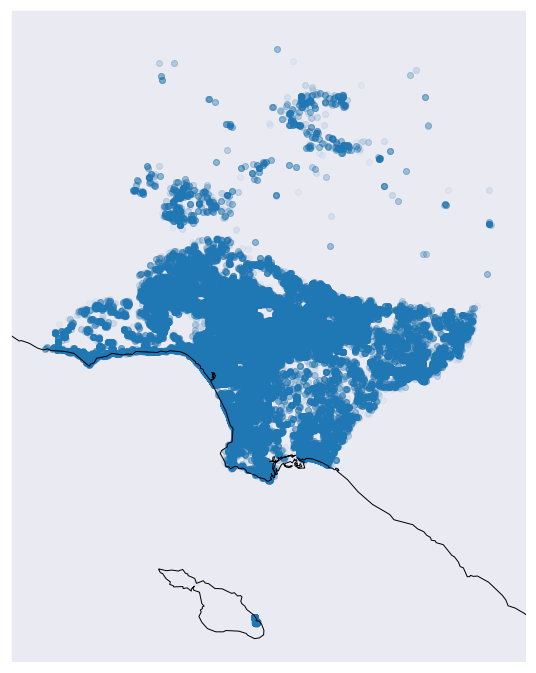

In [15]:
fig = plt.figure(figsize=(12, 12))
buffer = 0.1
m = Basemap(projection='mill',
            llcrnrlat = lat_min - buffer,
            llcrnrlon = lon_min - buffer,
            urcrnrlat = lat_max + buffer,
            urcrnrlon = lon_max + buffer,
            resolution='h')

m.drawcoastlines()
m.drawstates(color='b')

lon, lat = m(listings['longitude'].tolist(), listings['latitude'].tolist())
m.scatter(lon, lat, alpha=0.05)

# add zipcode outlines
m.readshapefile('zipcodes/zipcodes','zips')

It's clear that there are so many listings in LA that we need to dig a bit deeper into the story of this data using some of the other attributes in the dataset.

### Beds, Baths, and Square Footage

Listings with more bedrooms, bathrooms, and square feet can accomodate more people, and therefore may have higher nightly prices. Let's see if this is actually the case.

#####  How does average price change with different numbers of beds?
Like in the previous bar plots, we'll use a pivot table to calculate the average price per number of bedrooms. We will also do the same for the number of bathrooms:

Text(0, 0.5, 'Price (USD)')

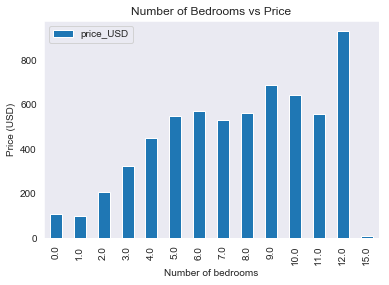

In [13]:
# pivot table for average price per number of bedrooms
price_per_bed = listings.pivot_table(values='price_USD', index='bedrooms', aggfunc='mean')

# plot the pivot table
price_per_bed.plot(kind='bar')
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price (USD)')

While the average price tends to increase as the number of bedrooms in a listing increases, it is not a clear trend. Additionally, it's worth looking into the details for the listing that has 15 bedrooms, as it seems to have a very low price and might be a bad or fradulent listing.

In [14]:
listings[listings.bedrooms == 15]

,access,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee_USD,country,country_code,date_recorded,description,experiences_offered,extra_people_USD,first_review,guests_included,has_availability,host_about,host_acceptance_rate_percentage,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate_percentage,host_response_time,host_since,host_thumbnail_url,host_total_listings_count,host_url,house_rules,id,instant_bookable,interaction,is_business_travel_ready,is_location_exact,jurisdiction_names,last_review,last_scraped,latitude,license,listing_url,longitude,market,maximum_nights,medium_url,minimum_nights,monthly_price_USD,name,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,notes,number_of_reviews,picture_url,price_USD,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit_USD,smart_location,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price_USD,xl_picture_url,zipcode,has__toilet,has_24-Hour_Check-in,has_Accessible-height_bed,has_Accessible-height_toilet,has_Air_Conditioning,has_Air_purifier,has_Alfresco_bathtub,has_Amazon_Echo,has_BBQ_grill,has_Baby_bath,has_Baby_monitor,has_Babysitter_recommendations,has_Balcony,has_Bath_towel,has_Bathroom_essentials,has_Bathtub,has_Bathtub_with_bath_chair,has_Beach_essentials,has_Beach_view,has_Beachfront,has_Bed_linens,has_Bedroom_comforts,has_Bidet,has_Body_soap,has_Breakfast,has_Breakfast_table,has_Brick_oven,has_Building_staff,has_Buzzer/Wireless_Intercom,has_Cable_TV,has_Carbon_Monoxide_Detector,has_Cardon_Monoxide_Detector,has_Cat(s),has_Ceiling_fan,has_Ceiling_hoist,has_Central_air_conditioning,has_Changing_table,has_Children’s_books_and_toys,has_Children’s_dinnerware,has_Cleaning_before_checkout,has_Coffee_maker,has_Convection_oven,has_Cooking_basics,has_Crib,has_DVD_player,has_Day_bed,has_Disabled_parking_spot,has_Dishes_and_silverware,has_Dishwasher,has_Dog(s),has_Doorman,has_Double_oven,has_Dryer,has_EV_charger,has_Electric_profiling_bed,has_Elevator,has_En_suite_bathroom,has_Espresso_machine,has_Essentials,has_Ethernet_connection,has_Exercise_equipment,has_Extra_pillows_and_blankets,has_Family/Kid_Friendly,has_Fax_machine,has_Fire_Extinguisher,has_Fire_pit,has_Fireplace_guards,has_Firm_mattress,has_First_Aid_Kit,has_Fixed_grab_bars_for_shower,has_Fixed_grab_bars_for_toilet,has_Flat_path_to_front_door,has_Formal_dining_area,has_Free_Parking_on_Premises,has_Free_parking_on_street,has_Free_street_parking,has_Front_desk/doorperson,has_Full_kitchen,has_Game_console,has_Garden_or_backyard,has_Gas_oven,has_Ground_floor_access,has_Gym,has_HBO_GO,has_Hair_Dryer,has_Hammock,has_Handheld_shower_head,has_Hangers,has_Heat_lamps,has_Heated_floors,has_Heated_towel_rack,has_Heating,has_High_chair,has_High-resolution_computer_monitor,has_Host_greets_you,has_Hot_Tub,has_Hot_water,has_Hot_water_kettle,has_Indoor_Fireplace,has_Internet,has_Iron,has_Jetted_tub,has_Keypad,has_Kitchen,has_Kitchenette,has_Lake_access,has_Laptop_Friendly_Workspace,has_Lock_on_Bedroom_Door,has_Lockbox,has_Long_term_stays_allowed,has_Luggage_dropoff_allowed,has_Memory_foam_mattress,has_Microwave,has_Mini_fridge,has_Misting_system,has_Mobile_hoist,has_Mountain_view,has_Mudroom,has_Murphy_bed,has_Netflix,has_Other,has_Other_pet(s),has_Outdoor_kitchen,has_Outdoor_parking,has_Outdoor_seating,has_Outlet_covers,has_Oven,has_Pack_’n_Play/travel_crib,has_Paid_parking_off_premises,has_Paid_parking_on_premises,has_Patio_or_balcony,has_Pets_Allowed,h

In [15]:
listings[listings.bedrooms == 15]['description']

52570    This is a test listing. Please do not Book. Th...
Name: description, dtype: object

So it turns out that the listing with 15 bedrooms is a test listing! We will need to remove it from the dataset:

In [16]:
listings = listings[listings.bedrooms != 15]

In [17]:
len(listings)

600960

Text(0, 0.5, 'Price (USD)')

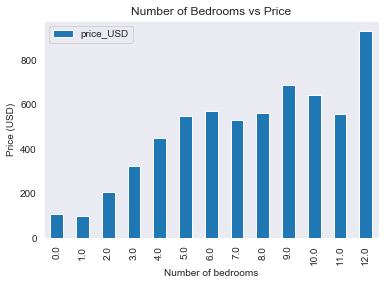

In [18]:
# pivot table for average price per number of bedrooms
price_per_bed = listings.pivot_table(values='price_USD', index='bedrooms', aggfunc='mean')

# plot the pivot table
price_per_bed.plot(kind='bar')
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price (USD)')

##### How does average price change with different numbers of bathrooms?

Text(0, 0.5, 'Price (USD)')

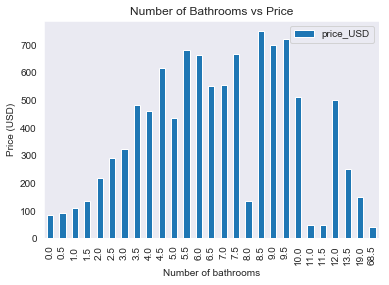

In [19]:
# pivot table for average price per number of bathrooms
price_per_bath = listings.pivot_table(values='price_USD', index='bathrooms', aggfunc='mean')

# plot the pivot table
price_per_bath.plot(kind='bar')
plt.title('Number of Bathrooms vs Price')
plt.xlabel('Number of bathrooms')
plt.ylabel('Price (USD)')

In [20]:
listings[listings.bathrooms >= 12]['listing_url']

252376    https://www.airbnb.com/rooms/28280768
421180    https://www.airbnb.com/rooms/23650347
431056    https://www.airbnb.com/rooms/28280768
431061    https://www.airbnb.com/rooms/28281834
577007    https://www.airbnb.com/rooms/17009815
598974    https://www.airbnb.com/rooms/28280768
Name: listing_url, dtype: object

In [21]:
listings[listings.bathrooms == 0]['listing_url']

402         https://www.airbnb.com/rooms/337960
493          https://www.airbnb.com/rooms/20786
706        https://www.airbnb.com/rooms/6214700
968        https://www.airbnb.com/rooms/5138076
2331       https://www.airbnb.com/rooms/6286520
2619       https://www.airbnb.com/rooms/1557529
2802       https://www.airbnb.com/rooms/2650811
2809       https://www.airbnb.com/rooms/2686109
2825       https://www.airbnb.com/rooms/2818454
4733       https://www.airbnb.com/rooms/3944943
5323       https://www.airbnb.com/rooms/7461357
5971         https://www.airbnb.com/rooms/22247
7123       https://www.airbnb.com/rooms/4848665
7243       https://www.airbnb.com/rooms/6646459
7506       https://www.airbnb.com/rooms/7245506
7970       https://www.airbnb.com/rooms/6066728
8098       https://www.airbnb.com/rooms/5029757
8169       https://www.airbnb.com/rooms/7028773
8566        https://www.airbnb.com/rooms/300371
8625       https://www.airbnb.com/rooms/6725556
8630       https://www.airbnb.com/rooms/

From looking at the listings with many bathrooms, we don't come across a legitimate listing until we go down to 12 bathrooms (those with 11 bathrooms tend to be dorms that list the number of bathrooms in the entire building). However, listings with zero bathrooms tend to be legitimate listings that correspond to dorms or shared housing. So I will remove the listings with many bathrooms from the dataset:

In [22]:
listings = listings[listings.bathrooms <= 12]

In [23]:
len(listings)

599183

Text(0, 0.5, 'Price (USD)')

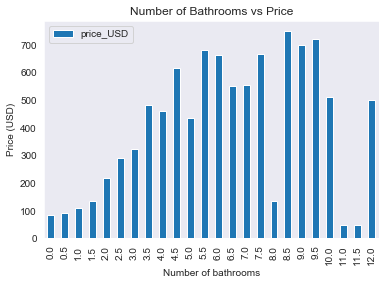

In [24]:
# pivot table for average price per number of bathrooms
price_per_bath = listings.pivot_table(values='price_USD', index='bathrooms', aggfunc='mean')

# plot the pivot table
price_per_bath.plot(kind='bar')
plt.title('Number of Bathrooms vs Price')
plt.xlabel('Number of bathrooms')
plt.ylabel('Price (USD)')

The price of a listing seems to generally increase with the number of bathrooms in that listing. The exception seems to be for dorms that list the number of bathrooms in the entire building, like I mentioned previously.

##### How does average price change with different square footage?

Square footage is a continuous variable that is worth exploring in conjunction with price. In the same vein as our logic for bedrooms and bathrooms, it's reasonable to think that a listing with higher square footage and more space will have higher prices. Let's explore this with a regression plot that will show us the data points of a sqft vs. price scatterplot along with a regression line showing the general trend in the data.

Text(-1.4499999999999957, 0.5, 'Price (USD)')

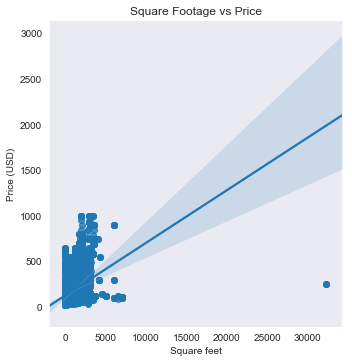

In [25]:
# plot square feet vs. price with regression
sns.lmplot(x='square_feet', y='price_USD', data=listings)
plt.title('Square Footage vs Price')
plt.xlabel('Square feet')
plt.ylabel('Price (USD)')

The square footage data clearly has an outlier at about 32,500 square feet. This makes it harder to see trends in the rest of the data, so let's investigate this listing:

In [26]:
listings[listings.square_feet > 30000]['listing_url']

326011    https://www.airbnb.com/rooms/1317363
451185    https://www.airbnb.com/rooms/1317363
546524    https://www.airbnb.com/rooms/1317363
Name: listing_url, dtype: object

When visiting the URL for the outlier, it looks like the listing does not exist. I think this justifies removing it from the dataset:

In [27]:
listings = listings.drop([326011, 451185, 546524], axis=0)
len(listings)

599180

Text(-1.4499999999999957, 0.5, 'Price (USD)')

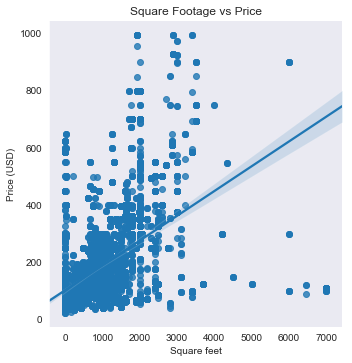

In [28]:
# plot square feet vs. price with regression
sns.lmplot(x='square_feet', y='price_USD', data=listings)
plt.title('Square Footage vs Price')
plt.xlabel('Square feet')
plt.ylabel('Price (USD)')

Without the outlier, the regression plot suggests a positive trend in the data, with more square footage corresponding to higher prices. However, the data itself is so varied that it's unclear how influential square footage will be.

### Zipcode

Average prices most likely vary in different zipcodes. If we think of zipcodes as different neighborhoods, some are bound to be more upscale and closer to tourist attractions, while others will be more budget-friendly.

##### How does average price change across zipcodes?

In [40]:
# listings per zipcode
avg_price_per_zipcode = listings.pivot_table(values='price_USD', index='zipcode', aggfunc='mean')

Since there are hundreds of zipcodes in LA, let's zoom in to the 10 zipcodes with the highest and lowest average listing prices:

In [30]:
# put head and tail together
ppz = pd.concat([avg_price_per_zipcode.head(), avg_price_per_zipcode.tail()]).sort_values(by='price_USD')

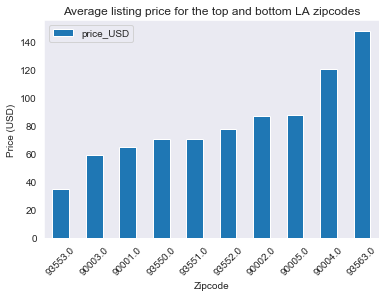

In [31]:
# plot zipcodes with highest and lowest average prices
ppz.plot(kind='bar')
plt.title('Average listing price for the top and bottom LA zipcodes')
plt.xlabel('Zipcode')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend(loc=None)

The bar graph shows that the lowest prices are for zipcodes that correspond to lower-income and working class areas like Palmdale (93550) Florence-Graham (90001, 90002), which have median household income levels of 50 thousand dollars and under. However, the highest prices actually correspond to a mix of lower and middle to high-income areas. For example, the highest priced zipcode corresponds to Valyermo (93563), which has a median household income of 84 thousand dollars, and the second highest priced zipcode, 90004, has a median household income of 46 thousand dollars. Therefore, an Airbnb listing's value is more likely based on features other than geographic location.

##### How is price geographically distributed in Los Angeles?

Let's map out how price is distributed across Los Angeles:

In [4]:
lon_min = listings.longitude.min()
lon_max = listings.longitude.max()
lat_min = listings.latitude.min()
lat_max = listings.latitude.max()

print('Minimum longitude:', lon_min)
print('Maximum longitude:', lon_max)
print('Minimum latitude:', lat_min)
print('Maximum latitude:', lat_max)

Minimum longitude: -118.93422403803541
Maximum longitude: -117.64753320949585
Minimum latitude: 33.33848276023134
Maximum latitude: 34.81119326709049


(0.0, 187551.374636582, 0.0, 234262.49488739576)

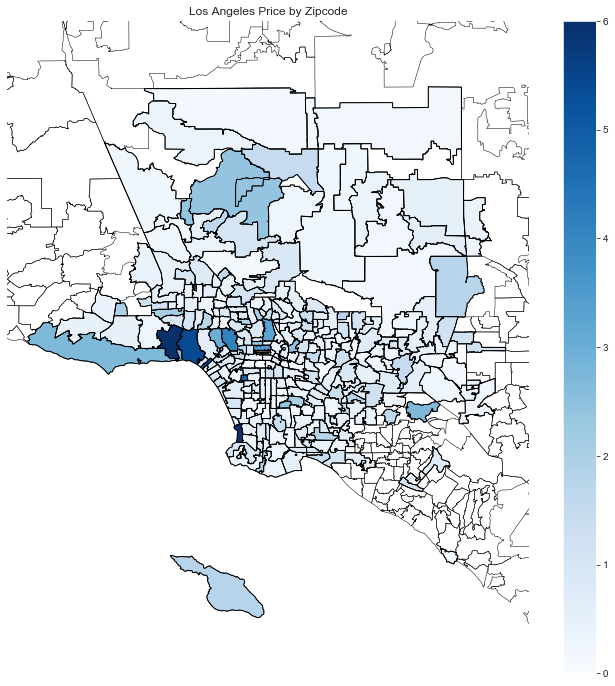

In [16]:
fig = plt.figure(figsize=(12, 12))
buffer = 0.2
colormap = plt.cm.Blues
m = Basemap(projection='mill',
            llcrnrlat = lat_min - buffer,
            llcrnrlon = lon_min - buffer,
            urcrnrlat = lat_max + buffer,
            urcrnrlon = lon_max + buffer,
            resolution='h')

m.drawstates(color='b')
# add zipcodes outlines
m.readshapefile('zipcodes/zipcodes','zips')

# read price and zipcode info into a dictionary
prices = {
    str(int(i)):j for (i, j) in zip(listings.zipcode, listings.price_USD)
}

ziplist = []
colors  = {}
vmin    = 0.
vmax    = 6.

zip_info   = m.zips_info
div     = (max(prices.values())/(vmax-vmin))
pricesscl = {i:(j/div) for (i,j) in prices.items()}

for d in zip_info:
    iterzip = d["ZCTA5CE10"]
    if iterzip in pricesscl.keys():
        iterpop = pricesscl.get(iterzip,0)
        colors[iterzip] = colormap(iterpop/vmax)[:3]
    ziplist.append(iterzip)

for nshape,seg in enumerate(m.zips):
    i, j = zip(*seg)
    if ziplist[nshape] in pricesscl.keys():
        color = rgb2hex(colors[ziplist[nshape]])
        edgecolor = "#000000"
        plt.fill(i,j,color,edgecolor=edgecolor);

# include colorbar.
sm = plt.cm.ScalarMappable(
    cmap=colormap,norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    )

mm = plt.cm.ScalarMappable(cmap=colormap)
mm.set_array([vmin, vmax])
plt.colorbar(mm,ticks=np.arange(vmin, vmax+1, 1),orientation="vertical")
plt.title("Los Angeles Price by Zipcode")
plt.gca().axis("off")

The map displays how expensive or inexpensive Airbnb listings tend to be in a particular zipcode of Los Angeles, with higher valies on the colorbar corresponding to more expensive listings. It looks like 90290, 90272, and 90263 have very expensive listings - this makes sense because these zipcodes corresponds to Calabases, Pacific Palisades, and Malibu, some of the richest areas in the state.

### Property Type

While certain zipcodes may be more expensive than others, prices likely also vary based on the nature of a listing itself. For example, it wouldn't make economic sense to charge the same for an urban apartment as a vacation home by the beach.

In addition, Airbnb is known for its unique accomodation options, which include boats, treehouses, and more. These specialty listings come with an extra 'wow' factor that may affect their price as well.

##### How does average price change for different property types?

Like for the zipcode data, it will be easier to inspect the ten property types that have the highest and lowest average price:

In [12]:
# put head and tail together
price_per_property = listings.pivot_table(values='price_USD', index='property_type', aggfunc='mean')
ppp = pd.concat([price_per_property.head(), price_per_property.tail()]).sort_values(by='price_USD')

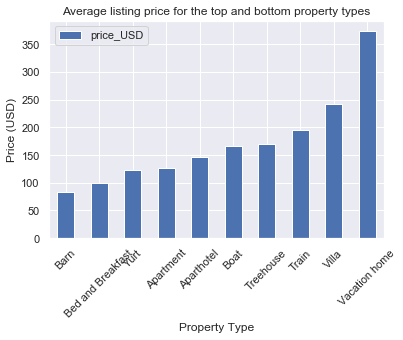

In [13]:
# plot property types with highest and lowest average prices
ppp.plot(kind='bar')
plt.title('Average listing price for the top and bottom property types')
plt.xlabel('Property Type')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend(loc=None)

The bar graph shows that barns, bed and breakfasts, and yurts have the lowest average price, while more specialty proprety types like treehouses, trains, villas, and vacation homes are the most expensive. Vacation homes, in fact, are almost $150 more expensive on average than the next more expensive property type, Villa.

In [102]:
ap = listings[listings['property_type'] == 'Barn'].groupby('zipcode').size()
vh = listings[listings['property_type'] == 'Vacation home'].groupby('zipcode').size()
ap_vh = pd.concat([ap, vh], axis=1).reset_index()
ap_vh.rename(columns={0:'apartment',
                     1:'vacation_home'}, inplace=True)
ap_vh

,zipcode,apartment,vacation_home
0,90008.0,3.0,NaN
1,90018.0,NaN,4.0
2,90019.0,NaN,1.0
3,90026.0,NaN,2.0
4,90027.0,NaN,2.0
5,90034.0,NaN,1.0
6,90039.0,3.0,NaN
7,90046.0,2.0,1.0
8,90048.0,NaN,3.0
9,90068.0,NaN,5.0


##### How are different property types geographically distributed in Los Angeles?

(0.0, 187551.374636582, 0.0, 234262.49488739576)

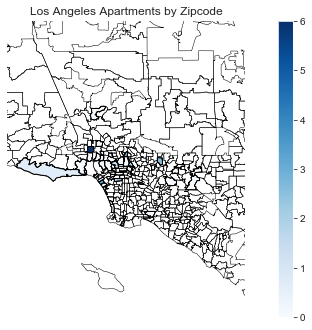

In [101]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(211)
ax.set_title("Los Angeles Aparments by Zipcode")

buffer = 0.2
colormap = plt.cm.Blues

m = Basemap(projection='mill',
            llcrnrlat = lat_min - buffer,
            llcrnrlon = lon_min - buffer,
            urcrnrlat = lat_max + buffer,
            urcrnrlon = lon_max + buffer,
            resolution='h')

m.drawstates(color='b')
# add zipcodes outlines
m.readshapefile('zipcodes/zipcodes','zips')

# read price and zipcode info into a dictionary
app = {
    str(int(i)):j for (i, j) in zip(ap_vh.zipcode, ap_vh.apartment)
}

ziplist = []
colors  = {}
vmin    = 0.
vmax    = 6.

zip_info   = m.zips_info
div     = (max(app.values())/(vmax-vmin))
appscl = {i:(j/div) for (i,j) in app.items()}

for d in zip_info:
    iterzip = d["ZCTA5CE10"]
    if iterzip in appscl.keys():
        iterpop = appscl.get(iterzip,0)
        colors[iterzip] = colormap(iterpop/vmax)[:3]
    ziplist.append(iterzip)

for nshape,seg in enumerate(m.zips):
    i, j = zip(*seg)
    if ziplist[nshape] in appscl.keys():
        color = rgb2hex(colors[ziplist[nshape]])
        edgecolor = "#000000"
        plt.fill(i,j,color,edgecolor=edgecolor);

# include colorbar.
sm = plt.cm.ScalarMappable(
    cmap=colormap,norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    )

mm = plt.cm.ScalarMappable(cmap=colormap)
mm.set_array([vmin, vmax])
plt.colorbar(mm,ticks=np.arange(vmin, vmax+1, 1),orientation="vertical")
plt.title("Los Angeles Apartments by Zipcode")
plt.gca().axis("off")

(0.0, 187551.374636582, 0.0, 234262.49488739576)

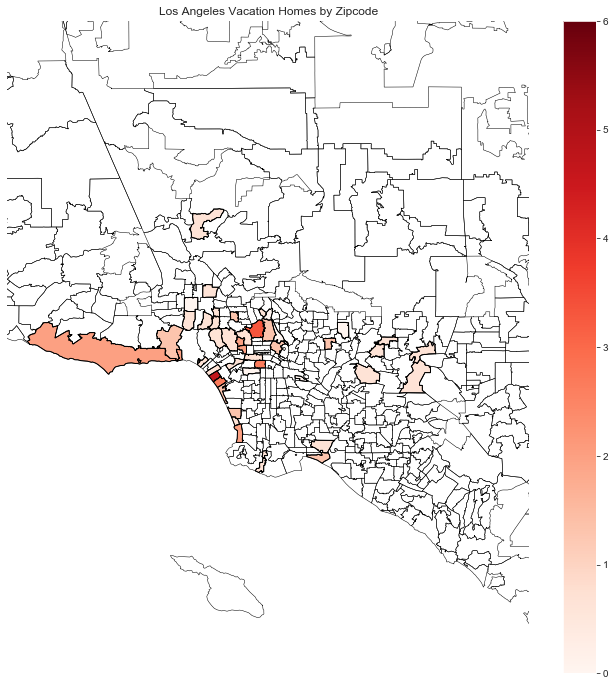

In [98]:
fig = plt.figure(figsize=(12, 12))
buffer = 0.2
colormap = plt.cm.Reds
m = Basemap(projection='mill',
            llcrnrlat = lat_min - buffer,
            llcrnrlon = lon_min - buffer,
            urcrnrlat = lat_max + buffer,
            urcrnrlon = lon_max + buffer,
            resolution='h')

m.drawstates(color='b')
# add zipcodes outlines
m.readshapefile('zipcodes/zipcodes','zips')

# read price and zipcode info into a dictionary
vh = {
    str(int(i)):j for (i, j) in zip(ap_vh.zipcode, ap_vh.vacation_home)
}

ziplist = []
colors  = {}
vmin    = 0.
vmax    = 6.

zip_info   = m.zips_info
div     = (max(app.values())/(vmax-vmin))
vhscl = {i:(j/div) for (i,j) in vh.items()}

for d in zip_info:
    iterzip = d["ZCTA5CE10"]
    if iterzip in vhscl.keys():
        iterpop = vhscl.get(iterzip,0)
        colors[iterzip] = colormap(iterpop/vmax)[:3]
    ziplist.append(iterzip)

for nshape,seg in enumerate(m.zips):
    i, j = zip(*seg)
    if ziplist[nshape] in vhscl.keys():
        color = rgb2hex(colors[ziplist[nshape]])
        edgecolor = "#000000"
        plt.fill(i,j,color,edgecolor=edgecolor);

# include colorbar.
sm = plt.cm.ScalarMappable(
    cmap=colormap,norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    )

mm = plt.cm.ScalarMappable(cmap=colormap)
mm.set_array([vmin, vmax])
plt.colorbar(mm,ticks=np.arange(vmin, vmax+1, 1),orientation="vertical")
plt.title("Los Angeles Vacation Homes by Zipcode")
plt.gca().axis("off")

### Conclusions

The trends and relationships uncovered in this notebook lead us to a few conclusions/ideas for further exploration as we move forward with this project's analyses:

1. The data needs to be thouroughly inspected to make sure there are no slight differences in spelling or notation that leads to inaccurate analyses (like in the case of the 'property_type' column) or data that does not make sense( like in the 'zipcode' column).

2. It will be important to inspect outliers in the dataset to see if they are real or fraudulent listings. It might be worth it to check them against the Airbnb website. It's too good to be true that a listing with 15 bedrooms would be one of the cheapest out there.

3. There is a lot of interesting geographic variability in prices, and this may influence price more than other aspects of the data. On the other end of the spectrum, attributes that I thought would have more influence, like number of bathrooms and square footage, are not as strong as expected.

4. It will be interesting to see if there are any NLP techniques that might be applied to the text data that describes the listings, in addition to using NLP on each listings reviews.

5. Columns like 'amenities' should be encoded so that they can be analyzed more. A listing's features such as TV, Internet access, and breakfast may strongly impact its price.

### Hypothesis Moving Forward:

An Airbnb listing's nightly price will be most affected by:
    - Its geographical location
    - The type of property it is, and
    - The amenities provided